In [ ]:
# visualize SoG Chl_a
# GO Jan 2022

In [ ]:
# use matplotlib, pandas, numpy
# look at spatial / temporal pattern for SoG 

# dataset: 2015-2020 Chl_a from Rich Pawlowicz and Cit Sci program


In [1]:
import pandas as pd
from matplotlib import pyplot as plt, dates
import matplotlib.gridspec as grid_spec
from datetime import datetime, timedelta
from calendar import month_name
%matplotlib inline

In [92]:
path_chla = "C://Users//Greig//Sync//6. SSMSP Model//Model Greig//Data//28. Phytoplankton//Depth Int Chlorophyl Cit Sci Pawlowicz 2015-2019//ORIGINAL//"
file_chla = "CitSci_dIchl_20220117.csv"

skipheaderlines = 3
chla_df = pd.read_csv(path_chla + file_chla, skiprows=skipheaderlines, parse_dates=True)

# skip units line
chla_df = chla_df[1:]

chla_df["datetime_pd"] = pd.to_datetime(chla_df["datetime"])
# https://www.dataindependent.com/pandas/pandas-to-datetime/

chla_df = chla_df[chla_df["chl"] != "     NaN"].reset_index()
chla_df["chl"] = pd.to_numeric(chla_df["chl"])
chla_df = chla_df[["chl", "datetime_pd"]]
chla_df["year_"] = chla_df.datetime_pd.dt.year
chla_df["month_"] = chla_df.datetime_pd.dt.month
chla_df["day_"] = chla_df.datetime_pd.dt.day
chla_df

,chl,datetime_pd,year_,month_,day_
0,14.6834,2015-02-16 16:44:59,2015,2,16
1,15.6698,2015-02-16 16:51:33,2015,2,16
2,15.4532,2015-02-16 17:28:00,2015,2,16
3,15.7778,2015-02-16 17:35:43,2015,2,16
4,32.3012,2015-02-16 18:50:49,2015,2,16
...,...,...,...,...,...
7021,26.0740,2020-10-30 10:09:46,2020,10,30
7022,19.4926,2020-05-11 11:13:15,2020,5,11
7023,8.6802,2020-10-11 10:59:54,2020,10,11
7024,14.6828,2020-11-19 10:25:58,2020,11,19


<AxesSubplot:>

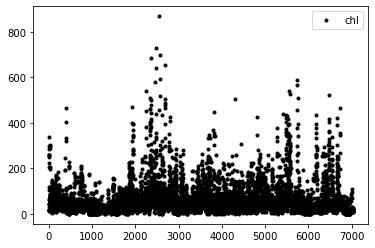

In [94]:
data_ = chla_df[["chl"]]
data_.plot(style='k.')

<AxesSubplot:xlabel='month_'>

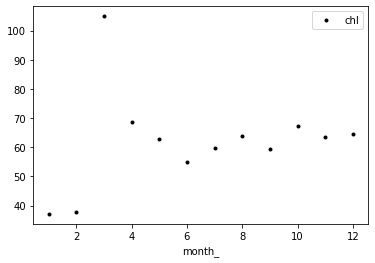

In [98]:
# Build figure layout
#fig, ax = plt.subplots(figsize=(15, 10))
#x = chla_df["datetime_pd"]
#y = chla_df["chl"]
#chla_df["i"] = chla_df
monthly_df = chla_df.groupby('month_').mean()
data_ = monthly_df[["chl"]]
data_.plot(style='k.')

<AxesSubplot:xlabel='year_,month_'>

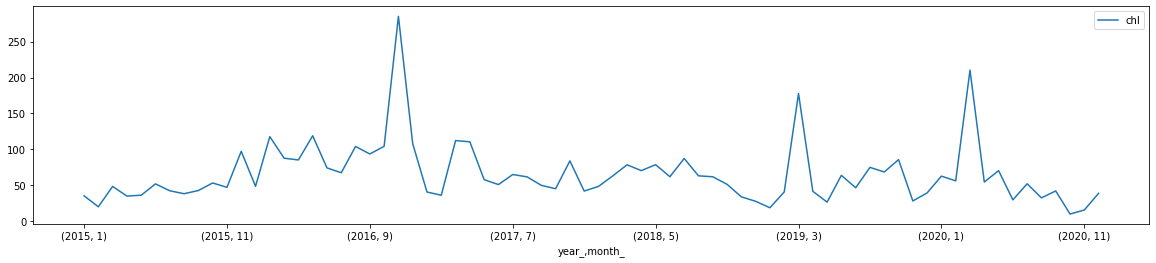

In [114]:
yearlymonthly_df = chla_df.groupby(['year_','month_']).mean()
yearlymonthly_df_samplecount = chla_df.groupby(['year_','month_']).count()
data_ = yearlymonthly_df[["chl"]]
plt.rcParams['figure.figsize'] = [20, 4]
data_.plot()


<AxesSubplot:xlabel='year_,month_'>

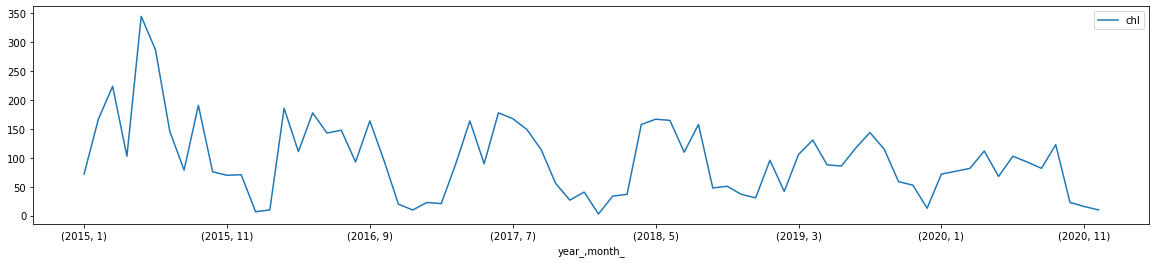

In [116]:
data_ = yearlymonthly_df_samplecount[["chl"]]
plt.rcParams['figure.figsize'] = [20, 4]
data_.plot()

In [115]:
yearlymonthly_df_samplecount

chl  datetime_pd  day_
year_ month_                        
2015  1        72           72    72
      2       167          167   167
      3       224          224   224
      4       103          103   103
      5       345          345   345
...           ...          ...   ...
2020  8        82           82    82
      9       123          123   123
      10       23           23    23
      11       16           16    16
      12       10           10    10

[72 rows x 3 columns]